In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")


imported libraries

# EDA

In [2]:
#load datafile
ds=pd.read_csv("avocado.csv")
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
ds.shape

(18249, 14)

Dataset has total 18249 rows and 14 columns

In [4]:
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
ds.keys()

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
ds.head() #top 5 rows of dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
ds.tail() #bottom 5 rows of dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Dataset Cleaning

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In this Dataset there is no null values, But Column 'Unnamed' is useless column so we can drop this column

In [10]:
#dropping column 'Unnamed'
ds.drop('Unnamed: 0', axis=1, inplace=True)
ds.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
ds.dtypes #check type of data

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As we can find here that dataset object values so we have to convert object values into int bu LabelEncoder

# Data Analsys & Visualization

In [12]:
ds.type

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

In [13]:
ds.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [14]:
ds.type.unique()

array(['conventional', 'organic'], dtype=object)

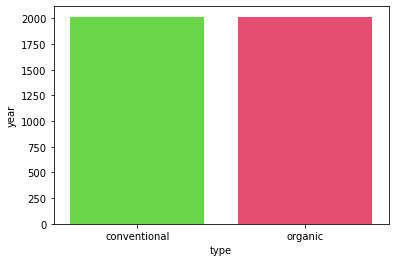

In [15]:
sns.barplot(data=ds, x=ds['type'],y=ds['year'],alpha=0.8,palette='prism')
plt.show()

Lets check

1-Avarage price of Avacado chages according to the year over the time.

2-& How avacado effects the pricing.

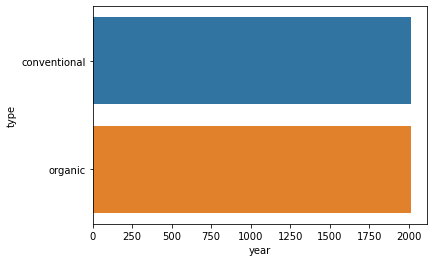

In [16]:
#showing barplot of avacodo type and year ratio
sns.barplot(data=ds, x=ds['year'],y=ds['type'])
plt.show()

# Lets check the Avacado Avarage price per year

<Figure size 1440x1800 with 0 Axes>

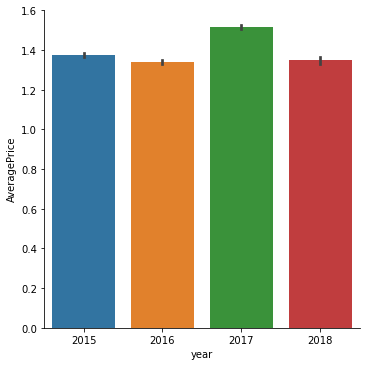

In [17]:
plt.figure(figsize=(20,25))
g=sns.catplot(x='year',y='AveragePrice',data=ds,kind='bar')

plt.show()

In this figure we can see that Avacado price is high in year 2017

<Figure size 1440x1800 with 0 Axes>

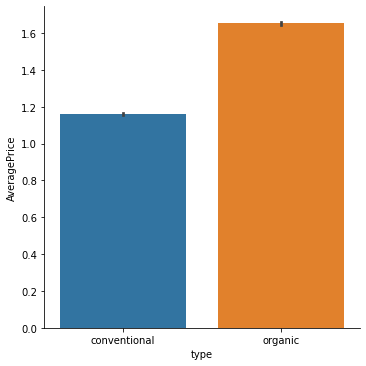

In [18]:
plt.figure(figsize=(20,25))
g=sns.catplot(x='type',y='AveragePrice',data=ds,kind='bar') #checking the avarage price of type of avacado
plt.title=('AvaragePrice VS type')
plt.show()

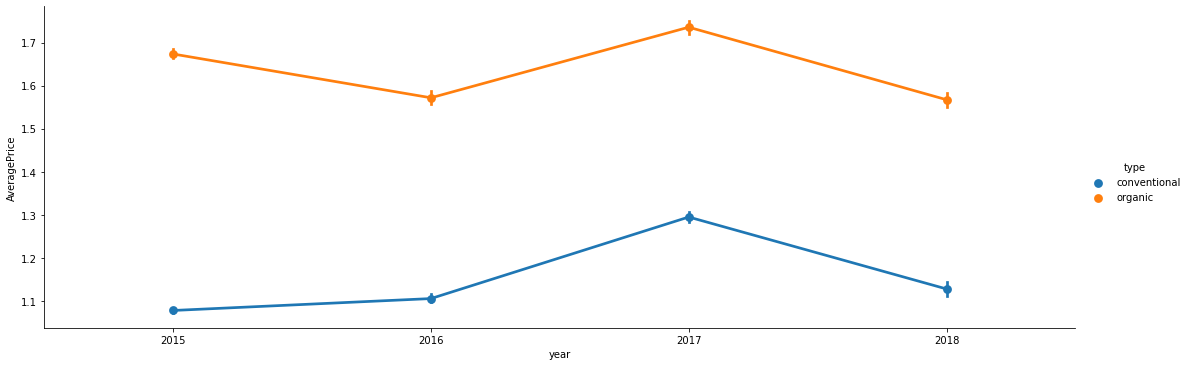

In [19]:
ax=sns.factorplot(x='year',y='AveragePrice',data=ds,hue='type',aspect=3)

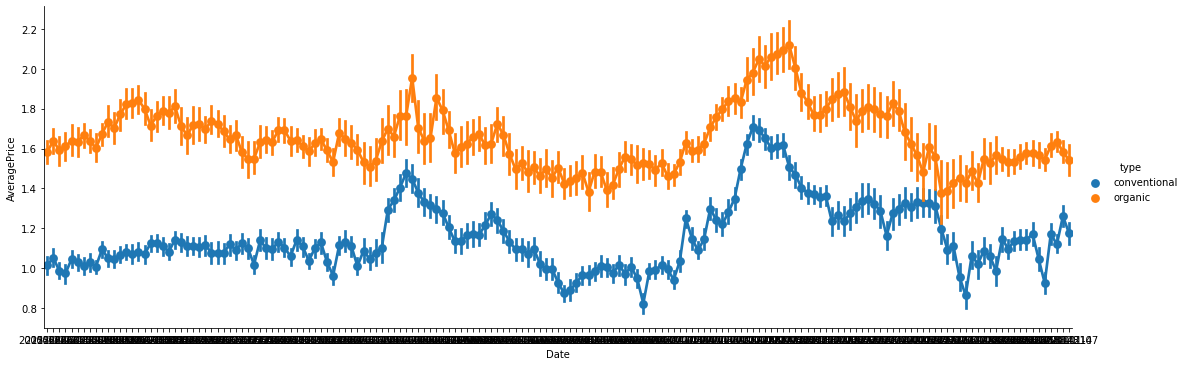

In [20]:
ax=sns.factorplot(x='Date',y='AveragePrice',data=ds,hue='type',aspect=3)

# Avarage Price VS Years

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

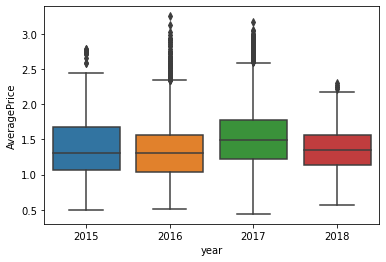

In [21]:
sns.boxplot(x='year',y='AveragePrice',data=ds)

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

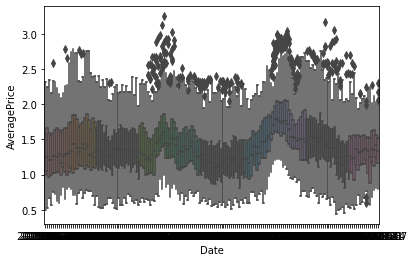

In [22]:
sns.boxplot(x='Date',y='AveragePrice',data=ds)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

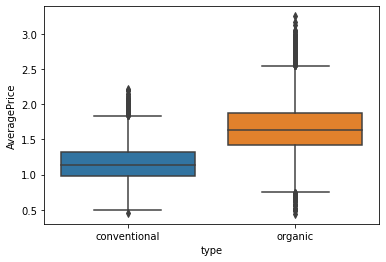

In [23]:
sns.boxplot(x='type',y='AveragePrice',data=ds)

# Yearly Avarage Price by year

<AxesSubplot:xlabel='year'>

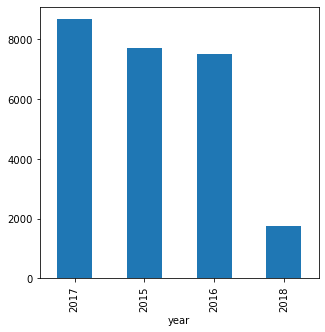

In [24]:
#lets find the Avarage price chages across year
ds.groupby('year')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(5,5))

<AxesSubplot:xlabel='Date'>

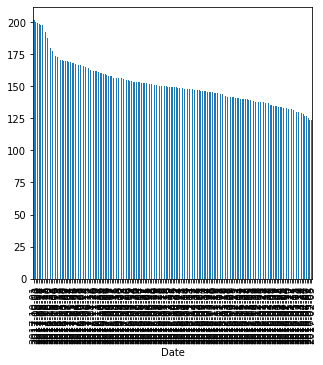

In [25]:
#lets find the Avarage price chages across Date
ds.groupby('Date')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(5,5))

<AxesSubplot:xlabel='region'>

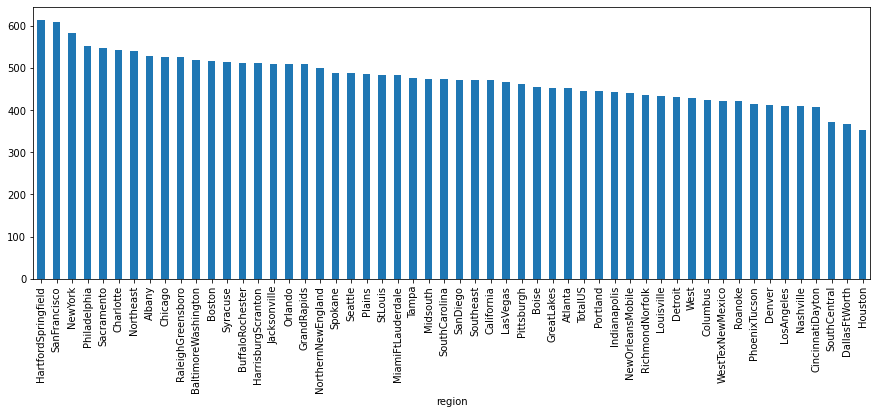

In [26]:
#lets find the Avarage price chages across region
ds.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))

In [27]:
#sns.swarmplot(data=ds, x=ds['year'], y=ds['AveragePrice'])

<Figure size 1296x360 with 0 Axes>

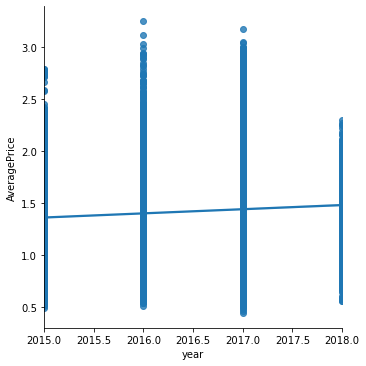

In [28]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.lmplot(x='year', y='AveragePrice', data=ds)
plt.show()

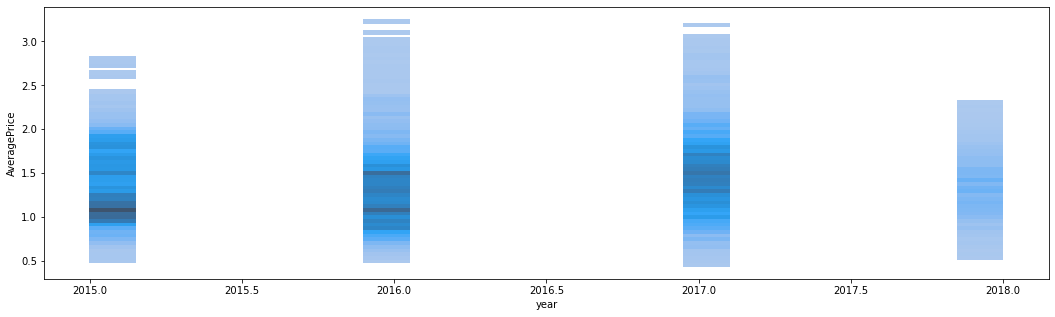

In [29]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='year', y='AveragePrice', data=ds)
plt.show()

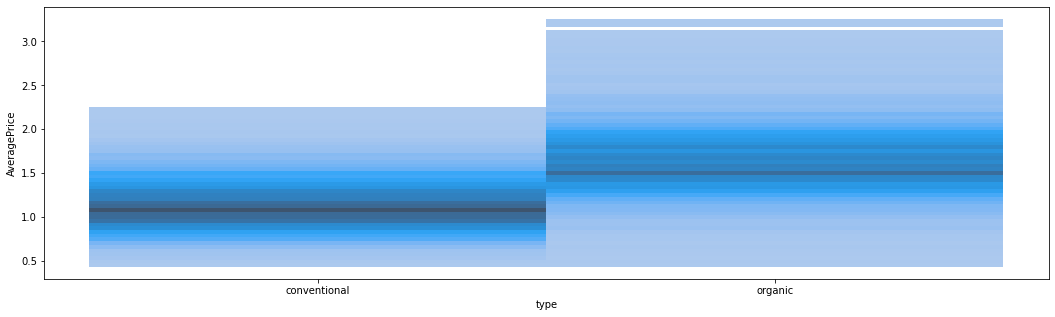

In [30]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='type', y='AveragePrice', data=ds)
plt.show()

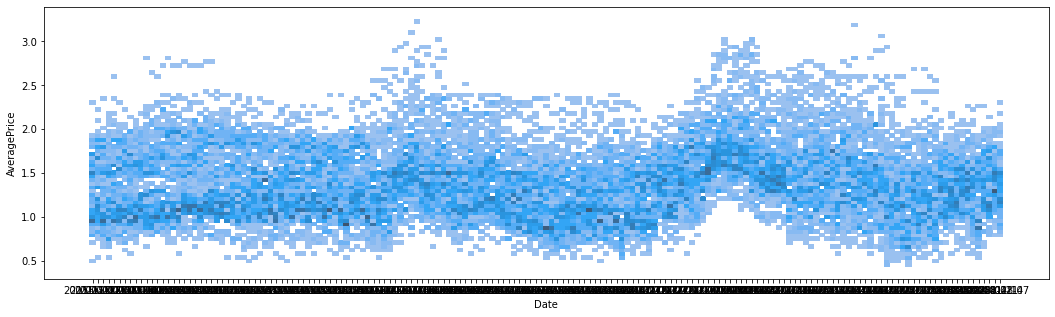

In [31]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='Date', y='AveragePrice', data=ds)
plt.show()

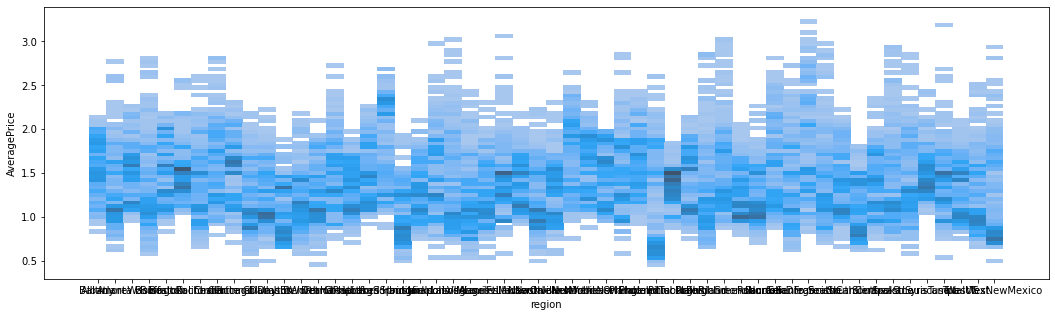

In [32]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='region', y='AveragePrice', data=ds)
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

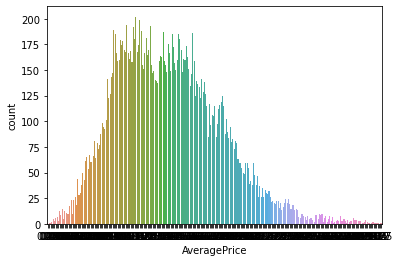

In [33]:
sns.countplot(x='AveragePrice',data=ds)

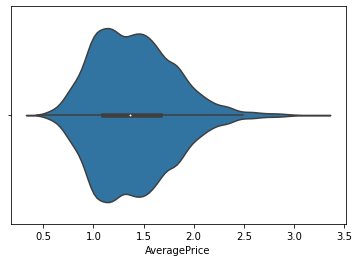

In [34]:
#plotting in violinplot with figure

sns.violinplot(ds['AveragePrice'])
plt.show()

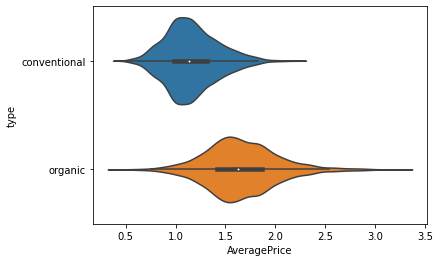

In [35]:
#plotting in violinplot with figure

sns.violinplot(data=ds, x='AveragePrice', y='type')
plt.show()

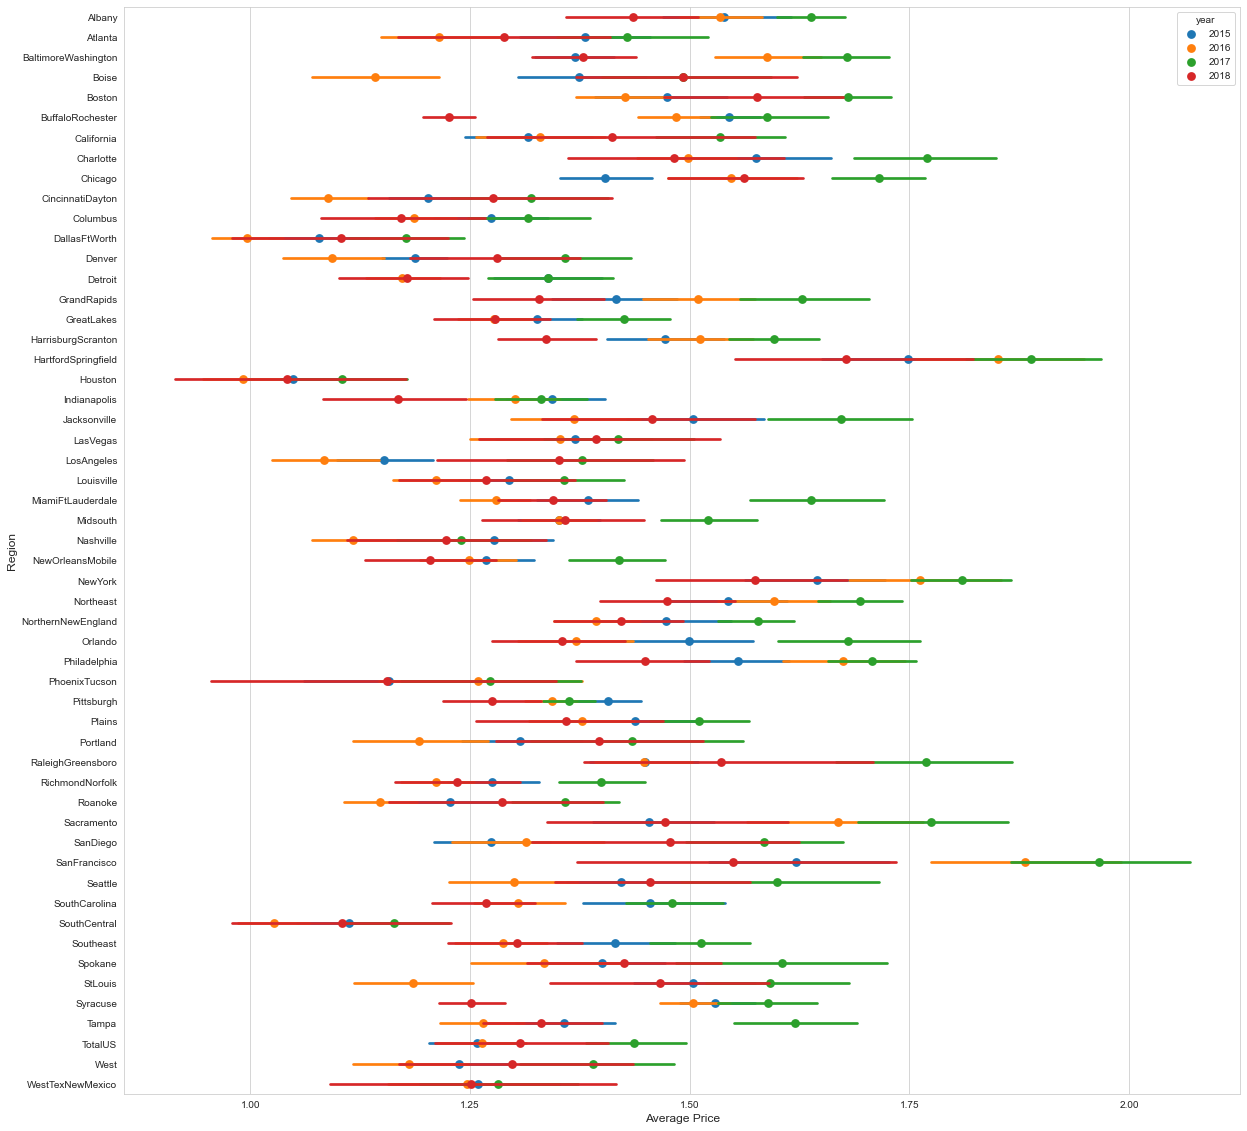

In [36]:
#plotting in pointplot with figure
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(data=ds, x='AveragePrice', y='region',hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.show()

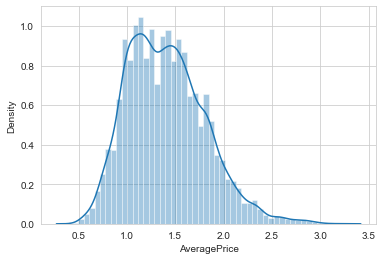

In [37]:
sns.distplot(ds['AveragePrice'])
plt.show()

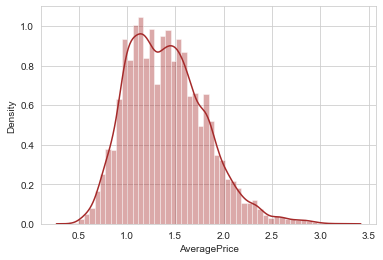

In [38]:
sns.distplot(ds['AveragePrice'],color='brown')
plt.show()

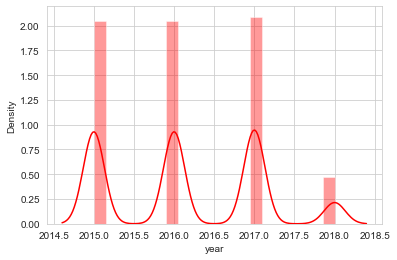

In [39]:
sns.distplot(ds['year'],color='red')
plt.show()

# Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()
ds['type']=le.fit_transform(ds['type'])
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [42]:
le=LabelEncoder()
ds['region']=le.fit_transform(ds['region'])
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [43]:
ds.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

Now we can see that we converted object values of 'type' and 'region' values into int

# Statistical Apporch

In [44]:
ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


checking the correlation of dataset variables

In [45]:
corr=ds.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

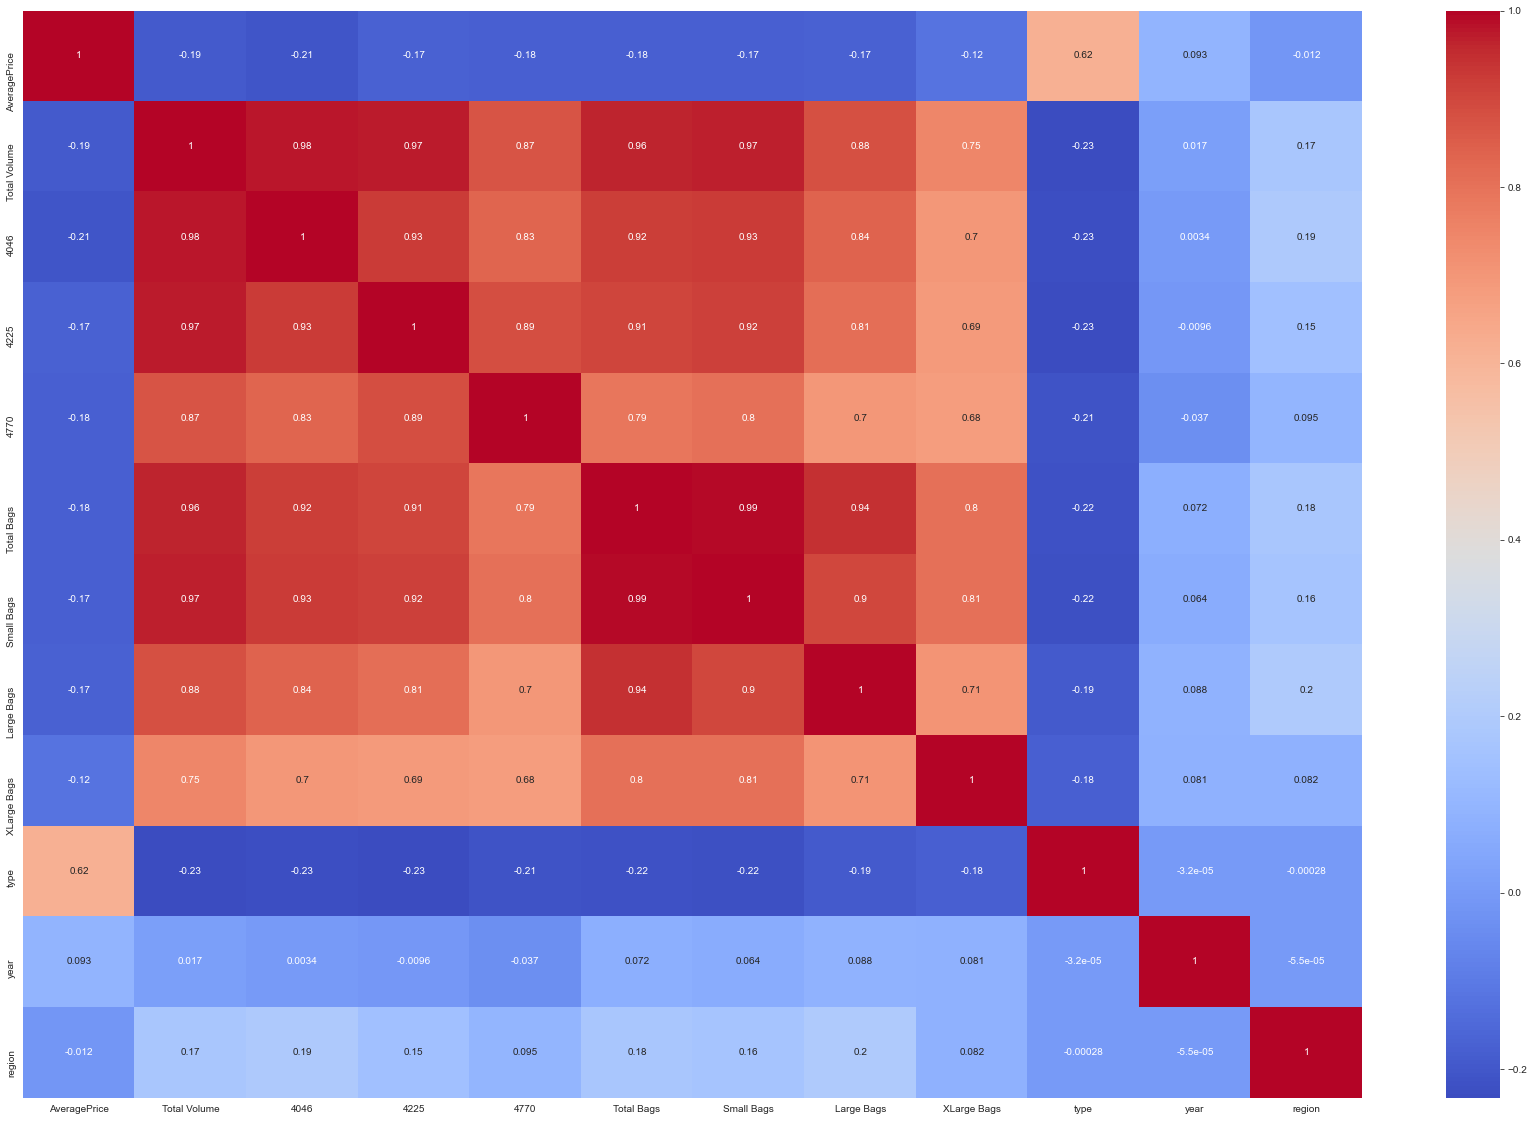

In [46]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')

We are checking correlation by help of heatmap and found that there is very good relation between 'total volume' and 'small begs' $ 'total bags' columns, 'total bags' & 'large bags' etc...

In [47]:
#finding unique number, max value, min value of each column in same time
for column in ds.columns:
    print(f"========Column: {column}========")
    print(f"Number of unique values: {ds[column].nunique()}")
    print(f"Max: {ds[column].max()}")
    print(f"Min: {ds[column].min()}")

========Column: Date========
Number of unique values: 169
Max: 2018-03-25
Min: 2015-01-04
========Column: AveragePrice========
Number of unique values: 259
Max: 3.25
Min: 0.44
========Column: Total Volume========
Number of unique values: 18237
Max: 62505646.52
Min: 84.56
========Column: 4046========
Number of unique values: 17702
Max: 22743616.17
Min: 0.0
========Column: 4225========
Number of unique values: 18103
Max: 20470572.61
Min: 0.0
========Column: 4770========
Number of unique values: 12071
Max: 2546439.11
Min: 0.0
========Column: Total Bags========
Number of unique values: 18097
Max: 19373134.37
Min: 0.0
========Column: Small Bags========
Number of unique values: 17321
Max: 13384586.8
Min: 0.0
========Column: Large Bags========
Number of unique values: 15082
Max: 5719096.61
Min: 0.0
========Column: XLarge Bags========
Number of unique values: 5588
Max: 551693.65
Min: 0.0
========Column: type========
Number of unique values: 2
Max: 1
Min: 0
========Column: year========
Number o

Plotting Outliers

AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
type            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
year            AxesSubplot(0.656429,0.391471;0.110714x0.222059)
region          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
dtype: object

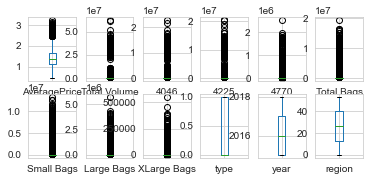

In [48]:
#df.plot
ds.plot(kind='box',subplots=True,layout=(3,6))

here we ca see that in some columns there is outliers so we have to remove this



# Removing Outliers

In [49]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [50]:
ds.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [51]:
columns=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']
for i in ds[columns]:
    lowScore, highScore= removeOutlier(ds[i])
    ds[i]=np.where(ds[i]>highScore,highScore,ds[i])
    ds[i]=np.where(ds[i]<lowScore,lowScore,ds[i])

AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
type            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
year            AxesSubplot(0.656429,0.391471;0.110714x0.222059)
region          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
dtype: object

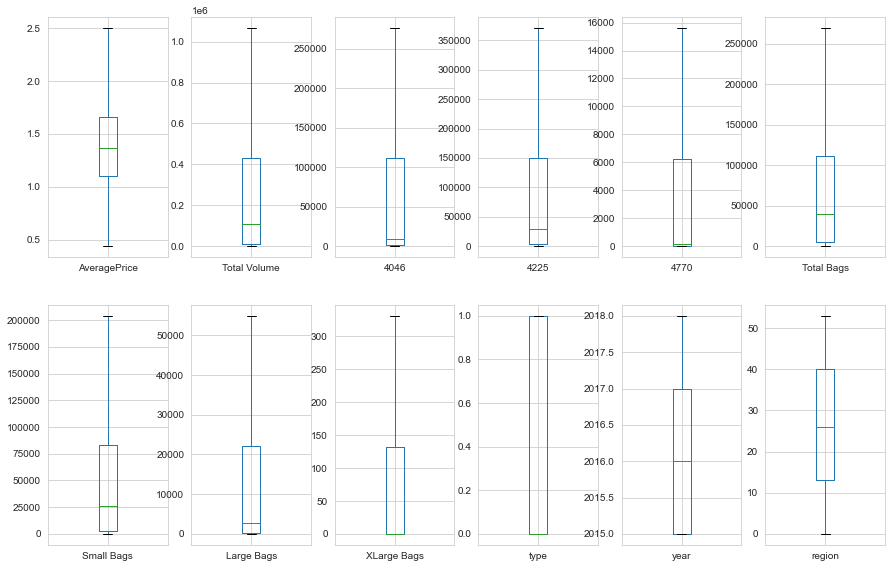

In [52]:
ds.plot(kind='box',subplots=True,layout=(3,6),figsize=(15,15))

We removed outliers succesfully, Now check the skewness again

# M/C learning models

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [54]:
#doing train and test to traing model
#x is the data value and y is the target value
ds_new=ds[['AveragePrice', 'Total Volume','Total Bags','year','region','type']]

x=ds_new[['AveragePrice', 'Total Volume',
       'Total Bags','year',
       'region']]
y=ds_new.type


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)
print('X train.Shape:',x_train.shape)
print('X test.shape:',x_test.shape)
print('Y train.shape:',y_train.shape)
print('Y test.shape:',y_test.shape)

X train.Shape: (13686, 5)
X test.shape: (4563, 5)
Y train.shape: (13686,)
Y test.shape: (4563,)


We are passing .25% data for test model. Lets chec the accuracy score, confusion metrix and classification score by different different alghorthm

# Logistic Regression

In [55]:
#using logical Regression ---> geting accuracy score, confusion _matrix and report
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print('\n')
print('confusion matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report:')
print(classification_report(y_test,pred))

accuracy score:
0.8923953539338155


confusion matrix:
[[1909  374]
 [ 117 2163]]


classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      2283
         1.0       0.85      0.95      0.90      2280

    accuracy                           0.89      4563
   macro avg       0.90      0.89      0.89      4563
weighted avg       0.90      0.89      0.89      4563



# GaussianNB()

In [56]:
#using Gaussian ---> geting accuracy score, confusion _matrix and report--> there are 2 variable output so using Gaussian
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print('\n')
print('confusion matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report:')
print(classification_report(y_test,pred))

accuracy score:
0.8073635765943459


confusion matrix:
[[1503  780]
 [  99 2181]]


classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.77      2283
         1.0       0.74      0.96      0.83      2280

    accuracy                           0.81      4563
   macro avg       0.84      0.81      0.80      4563
weighted avg       0.84      0.81      0.80      4563



# DecisionTreeClassifier

In [57]:
#using DecisionTree---> geting accuracy score, confusion _matrix and report
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print('\n')
print('confusion matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report:')
print(classification_report(y_test,pred))

accuracy score:
0.9846592154284461


confusion matrix:
[[2262   21]
 [  49 2231]]


classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2283
         1.0       0.99      0.98      0.98      2280

    accuracy                           0.98      4563
   macro avg       0.98      0.98      0.98      4563
weighted avg       0.98      0.98      0.98      4563



# SVC

In [58]:
#using SVC---> geting accuracy score, confusion _matrix and report
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print('\n')
print('confusion matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report:')
print(classification_report(y_test,pred))

accuracy score:
0.9268025421871575


confusion matrix:
[[2143  140]
 [ 194 2086]]


classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2283
         1.0       0.94      0.91      0.93      2280

    accuracy                           0.93      4563
   macro avg       0.93      0.93      0.93      4563
weighted avg       0.93      0.93      0.93      4563



# Random Forest Classifier

In [59]:
#using RandomForestClassifier---> geting accuracy score, confusion _matrix and report-->where manually put 500 to get good accuracy ---> in default 100
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print('\n')
print('confusion matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report:')
print(classification_report(y_test,pred))

accuracy score:
0.9905763751917598


confusion matrix:
[[2272   11]
 [  32 2248]]


classification report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2283
         1.0       1.00      0.99      0.99      2280

    accuracy                           0.99      4563
   macro avg       0.99      0.99      0.99      4563
weighted avg       0.99      0.99      0.99      4563



We got best accuracy score from RandomForestClassifier  0.9905763751917598

# Cross Validation of Accuracy Score

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score

In [61]:
#corss validate the SVC score
score=cross_val_score(lg, x, y, cv=5)
print(score)
print(score.mean())

[0.88109589 0.87287671 0.89753425 0.8830137  0.8816114 ]
0.8832263896657745


In [62]:
#corss validate the SVC score
score=cross_val_score(gnb, x, y, cv=5)
print(score)
print(score.mean())

[0.75863014 0.79726027 0.82739726 0.79972603 0.84488901]
0.8055805418635993


In [63]:
#corss validate the SVC score
score=cross_val_score(sv, x, y, cv=5)
print(score)
print(score.mean())

[0.93808219 0.90958904 0.94849315 0.91917808 0.92025212]
0.9271189179245957


In [64]:
#corss validate the Decision tree score
score=cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())

[0.98328767 0.96575342 0.97150685 0.95835616 0.95039737]
0.9658602957462543


In [65]:
#corss validate the rain forest tree score
score=cross_val_score(rf, x, y, cv=5)
print(score)
print(score.mean())

[0.97863014 0.97232877 0.99232877 0.96383562 0.97560976]
0.9765466087537588


# Hyper parameter tuning 

In [66]:
#using the GridSearch for hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

# in Decision tree gini get the best result (which is default)

{'criterion': 'entropy'}
0.9722173310758813


In [67]:
# changing random_state and n_estimators to get more accuracy
rf = RandomForestClassifier(n_estimators=500,random_state=37)
#RandomForenstClassifier(100)---Default
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9903572211264519
[[2274    9]
 [  35 2245]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2283
         1.0       1.00      0.98      0.99      2280

    accuracy                           0.99      4563
   macro avg       0.99      0.99      0.99      4563
weighted avg       0.99      0.99      0.99      4563



we got the best hypertunning parameter with Randomforest model

Now we found that we got best Accuracy Score, HyperParameter Tunning score and Cross Validation Score with Random Forest Classifier so we can save our model with RandomFOrestClassifier.

# file saving

In [68]:
#Saving Random Forest Classifier
import joblib
#saving the file as object file using joblib
joblib.dump(rf,"avacado_final.obj")

['avacado_final.obj']

In [69]:
avacado_final=joblib.load("avacado_final.obj")
avacado_final.predict(x_train)

array([0., 0., 1., ..., 1., 1., 1.])